In [2]:
Sys.setenv(R_REMOTES_NO_ERRORS_FROM_WARNINGS="true")

if (!requireNamespace("renv")) 
  install.packages("renv")
library(renv)
renv::restore()

Loading required namespace: renv

Installing package into ‘/n/holystore01/LABS/price_lab/Users/mjzhang/apps/R_4.0.2-fasrc01’
(as ‘lib’ is unspecified)


Attaching package: ‘renv’


The following object is masked from ‘package:Matrix’:

    update


The following objects are masked from ‘package:stats’:

    embed, update


The following objects are masked from ‘package:utils’:

    history, upgrade


The following objects are masked from ‘package:base’:

    load, remove




* The library is already synchronized with the lockfile.


In [1]:
library(ProjecTILs)

Loading required package: Seurat

Attaching SeuratObject

Loading required package: umap

Loading required package: Matrix

Loading required package: DBI

Loading required package: scGate

Loading required package: data.table

Loading required package: UCell

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: patchwork

Loading required package: ggridges

Loading required package: reshape2


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [3]:
setwd('/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/reference.ProjecTILs')

### Load reference 

In [137]:
ref <- load.reference.map()
ref_cd4 <- load.reference.map(ref="ref_LCMV_CD4_mouse_release_v1.rds")
ref_cd8 <- load.reference.map(ref="ref_LCMV_Atlas_mouse_v1.rds")

[1] "Loading Default Reference Atlas..."
[1] "/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/reference.ProjecTILs/ref_TILAtlas_mouse_v1.rds"
[1] "Loaded Reference map ref_TILAtlas_mouse_v1"
[1] "Loading Custom Reference Atlas..."
[1] "Loaded Custom Reference map ref_LCMV_CD4_mouse_v1"
[1] "Loading Custom Reference Atlas..."
[1] "Loaded Custom Reference map ref_LCMV_Atlas_mouse_v1"


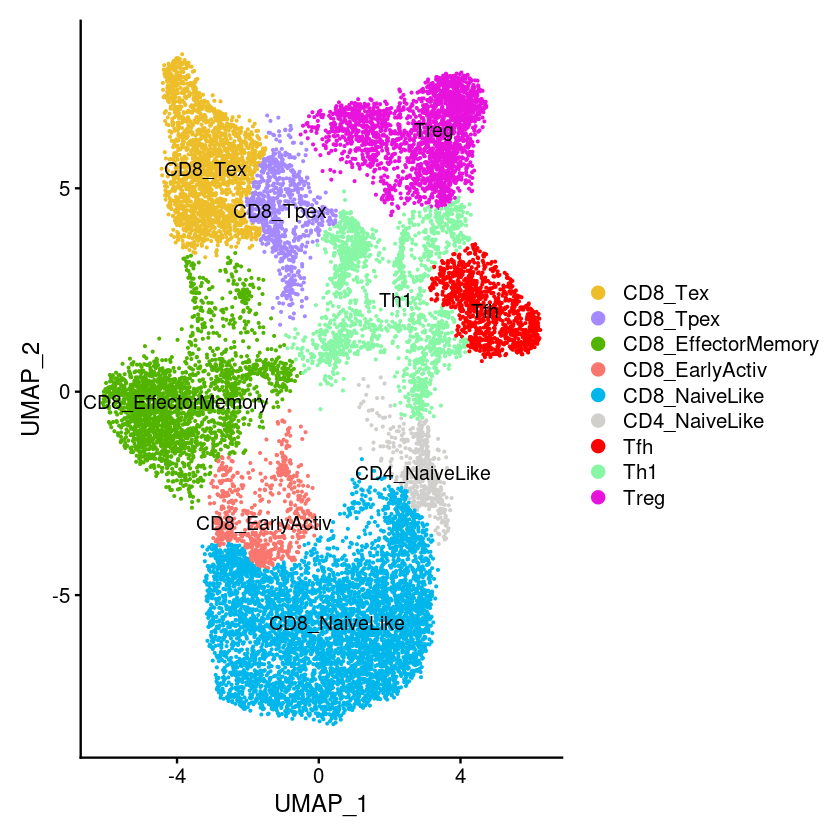

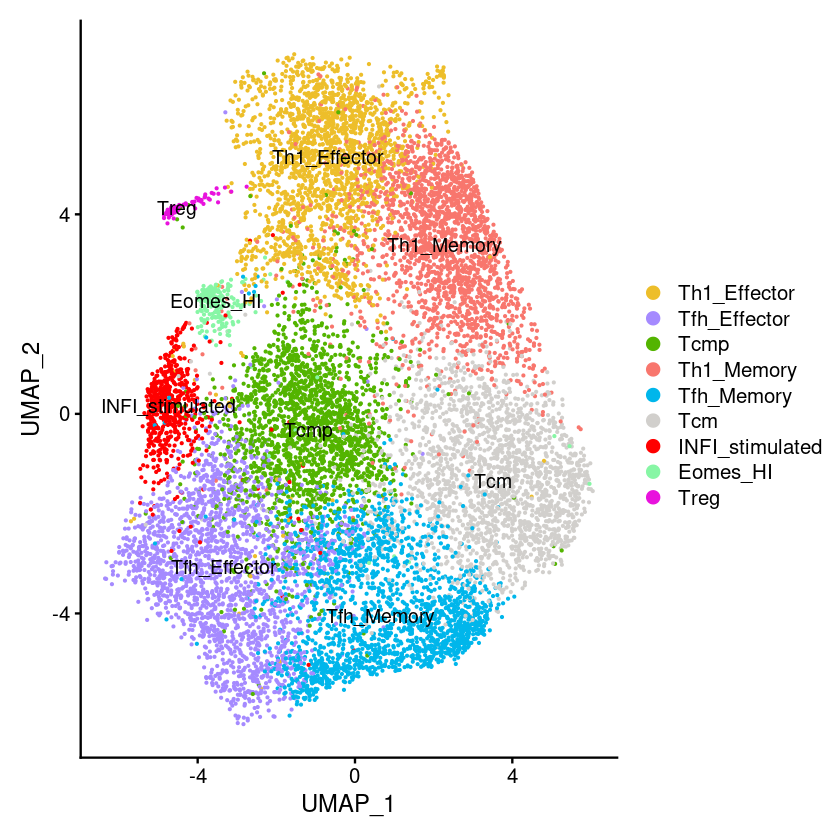

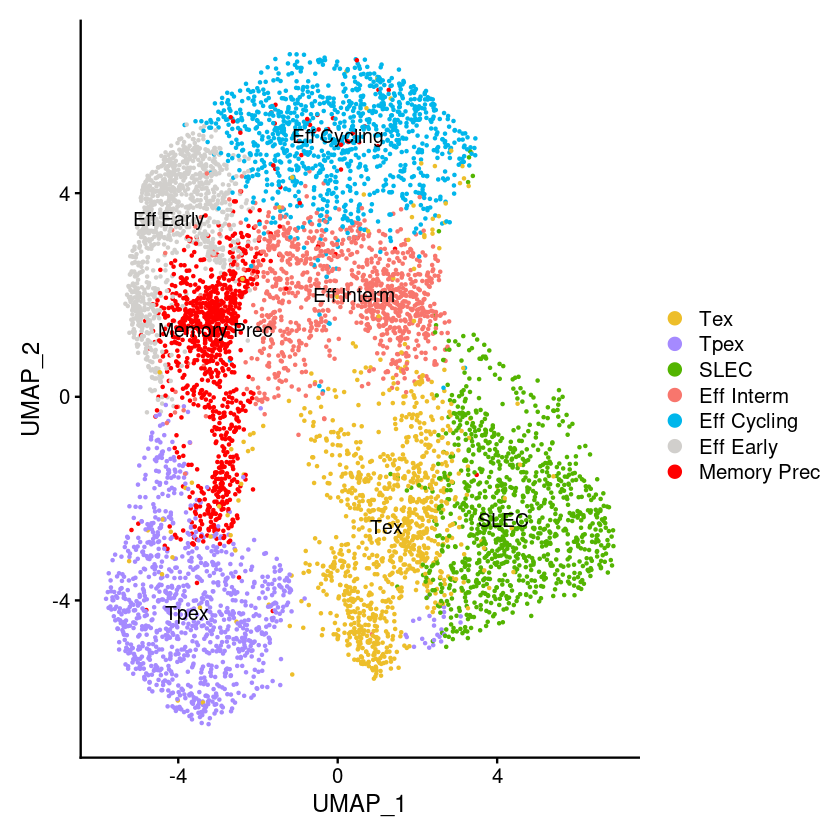

In [138]:
refCols <- c("#edbe2a", "#A58AFF", "#53B400", "#F8766D", "#00B6EB", "#d1cfcc", "#FF0000", "#87f6a5", "#e812dd")
DimPlot(ref,label = T, cols = refCols)
DimPlot(ref_cd4,label = T, cols = refCols)
DimPlot(ref_cd8,label = T, cols = refCols)

### Load data

In [139]:
# TMS FACS tcell data 
fname = paste0('/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/single_cell_data/tms_proc/',
               'tcell.facs_raw.annot.tsv.gz')
querydata_tms <- read.sc.query(fname, type='raw')

# Metadata
fname = paste0('/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/single_cell_data/tms_proc/',
               'tcell.facs_raw.annot.obs')
df_cov = read.table(fname, sep='\t', header=TRUE, row.names=1)

### Analysis and save data

[1] "Using assay RNA for query"


Pre-filtering cells with scGate...

No scGate model specified: using default filter for T cells


### Detected a total of 320 non-pure cells for selected signatures - 8.49% cells marked for removal (active.ident)



[1] "320 out of 3769 ( 8% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 1584 anchors




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


Creating slots functional.cluster and functional.cluster.conf in query object



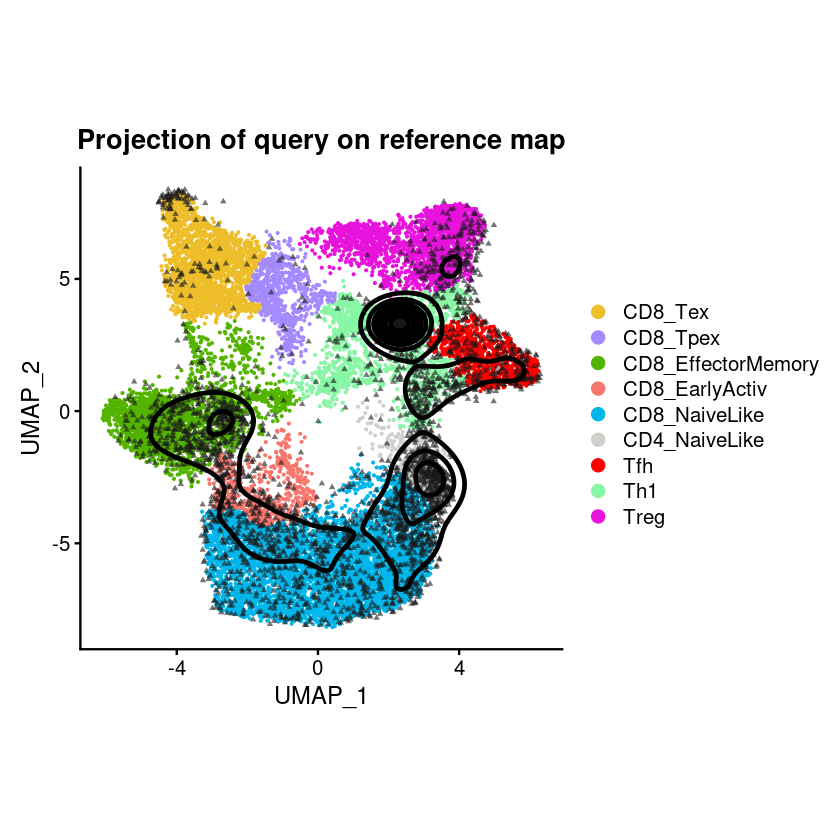

In [144]:
# ref + filter.cells=TRUE
query.projected.tms <- make.projection(querydata_tms, ref=ref)
query.projected.tms <- cellstate.predict(ref=ref, query=query.projected.tms)
plot.projection(ref, query.projected.tms)

# Save data 
file_name = "res.ProjecTILs.ref.FilCell.tsv"
write.table(query.projected.tms@meta.data, file=file_name, sep="\t", quote=FALSE)

[1] "Using assay RNA for query"
[1] "Aligning query to reference map for batch-correction..."


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 1741 anchors




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


Creating slots functional.cluster and functional.cluster.conf in query object



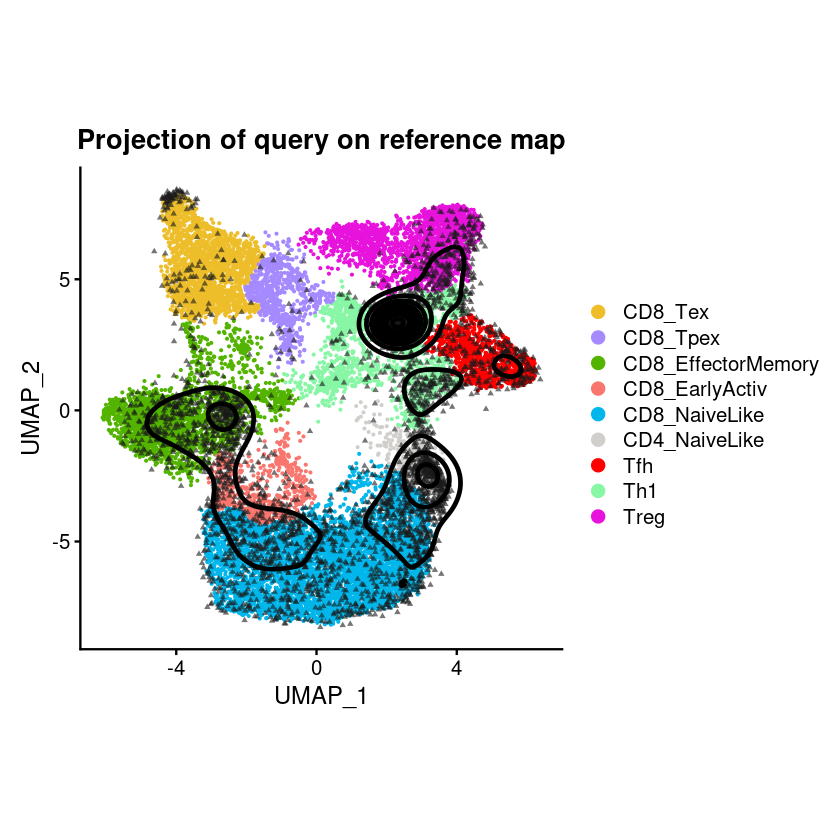

In [145]:
# ref + filter.cells=FALSE
query.projected.tms <- make.projection(querydata_tms, ref=ref, filter.cells=FALSE)
query.projected.tms <- cellstate.predict(ref=ref, query=query.projected.tms)
plot.projection(ref, query.projected.tms)

# Save data 
file_name = "res.ProjecTILs.ref.NoFilCell.tsv"
write.table(query.projected.tms@meta.data, file=file_name, sep="\t", quote=FALSE)

[1] "Using assay RNA for query"


Pre-filtering cells with scGate...


### Detected a total of 2855 non-pure cells for selected signatures - 75.75% cells marked for removal (active.ident)



[1] "2855 out of 3769 ( 76% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 640 anchors




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


Creating slots functional.cluster and functional.cluster.conf in query object



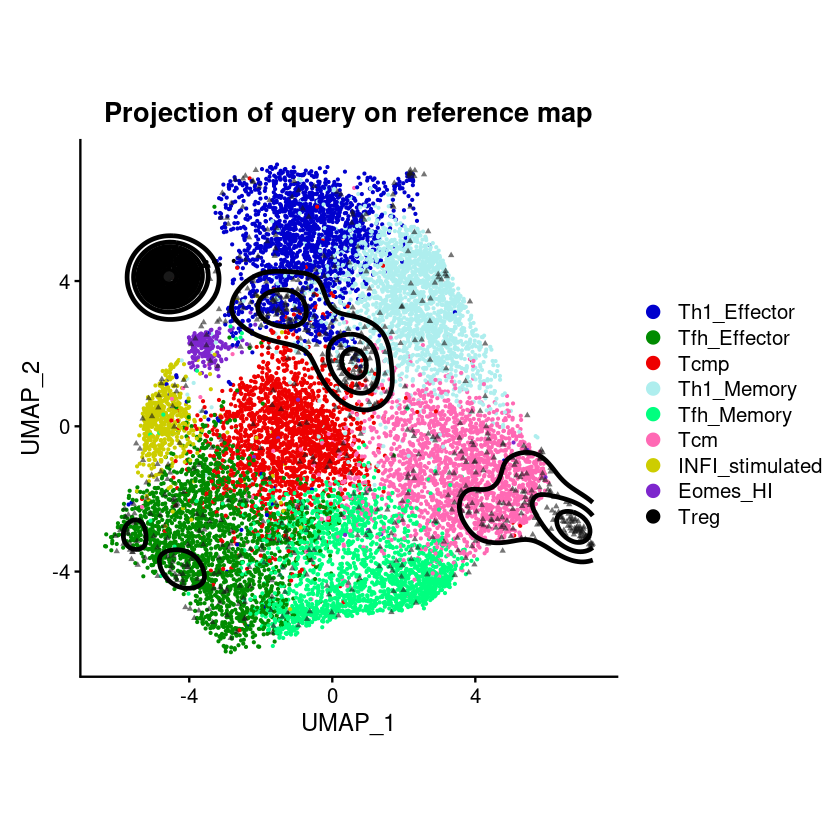

In [146]:
# ref_cd4 + filter.cells=TRUE
query.projected.tms <- make.projection(querydata_tms, ref=ref_cd4)
query.projected.tms <- cellstate.predict(ref=ref_cd4, query=query.projected.tms)
plot.projection(ref_cd4, query.projected.tms)

# Save data 
file_name = "res.ProjecTILs.ref_cd4.FilCell.tsv"
write.table(query.projected.tms@meta.data, file=file_name, sep="\t", quote=FALSE)

[1] "Using assay RNA for query"
[1] "Aligning query to reference map for batch-correction..."


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 1107 anchors




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


Creating slots functional.cluster and functional.cluster.conf in query object



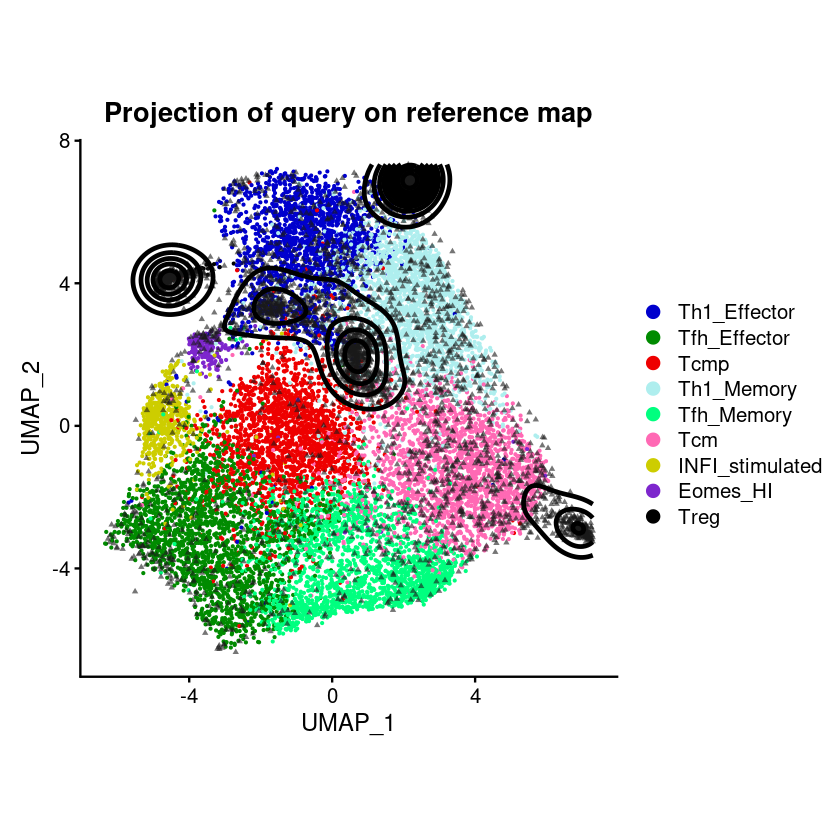

In [147]:
# ref_cd4 + filter.cells=FALSE
query.projected.tms <- make.projection(querydata_tms, ref=ref_cd4, filter.cells=FALSE)
query.projected.tms <- cellstate.predict(ref=ref_cd4, query=query.projected.tms)
plot.projection(ref_cd4, query.projected.tms)

# Save data 
file_name = "res.ProjecTILs.ref_cd4.NoFilCell.tsv"
write.table(query.projected.tms@meta.data, file=file_name, sep="\t", quote=FALSE)

[1] "Using assay RNA for query"


Pre-filtering cells with scGate...

No scGate model specified: using default filter for T cells


### Detected a total of 320 non-pure cells for selected signatures - 8.49% cells marked for removal (active.ident)



[1] "320 out of 3769 ( 8% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 1750 anchors




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


Creating slots functional.cluster and functional.cluster.conf in query object



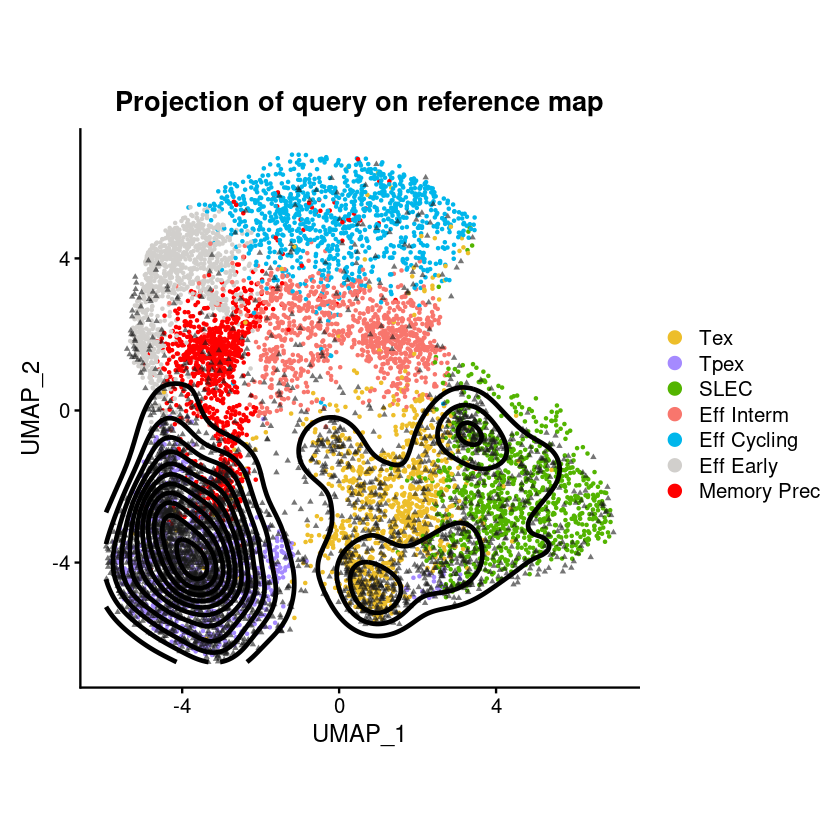

In [148]:
# ref_cd8 + filter.cells=TRUE
query.projected.tms <- make.projection(querydata_tms, ref=ref_cd8)
query.projected.tms <- cellstate.predict(ref=ref_cd8, query=query.projected.tms)
plot.projection(ref_cd8, query.projected.tms)

# Save data 
file_name = "res.ProjecTILs.ref_cd8.FilCell.tsv"
write.table(query.projected.tms@meta.data, file=file_name, sep="\t", quote=FALSE)

[1] "Using assay RNA for query"
[1] "Aligning query to reference map for batch-correction..."


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 1831 anchors




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


Creating slots functional.cluster and functional.cluster.conf in query object



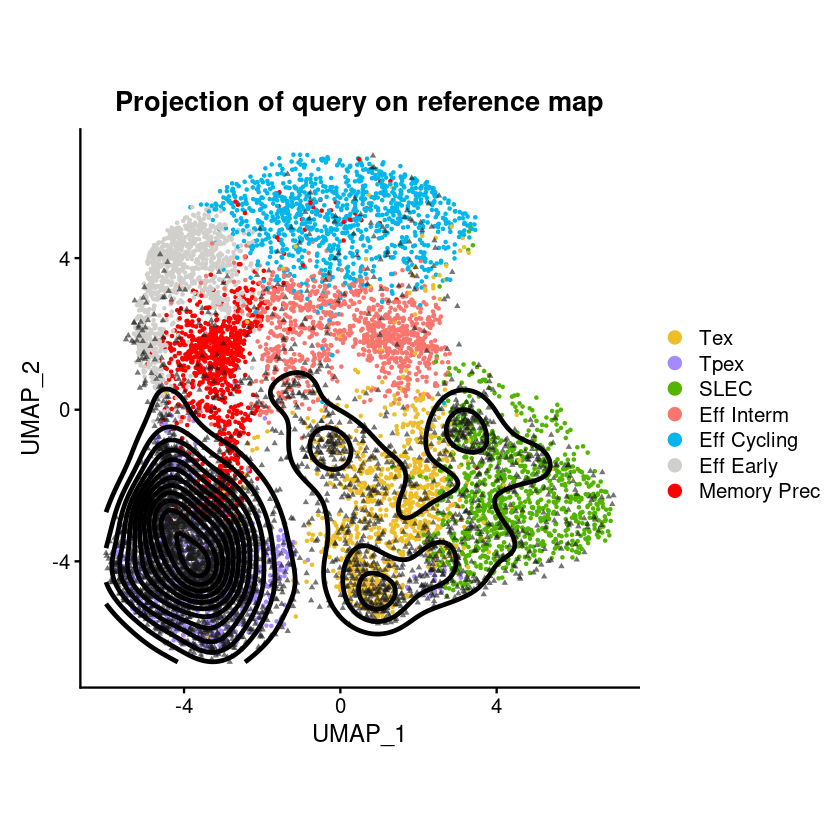

In [149]:
# ref_cd8 + filter.cells=FALSE
query.projected.tms <- make.projection(querydata_tms, ref=ref_cd8, filter.cells=FALSE)
query.projected.tms <- cellstate.predict(ref=ref_cd8, query=query.projected.tms)
plot.projection(ref_cd8, query.projected.tms)

# Save data 
file_name = "res.ProjecTILs.ref_cd8.NoFilCell.tsv"
write.table(query.projected.tms@meta.data, file=file_name, sep="\t", quote=FALSE)

### Old code

In [32]:
# Projection
query.projected.tms <- make.projection(querydata_tms, ref=ref)
query.projected.tms <- cellstate.predict(ref=ref, query=query.projected.tms)


[1] "Using assay RNA for query"


Pre-filtering cells with scGate...

No scGate model specified: using default filter for T cells


### Detected a total of 320 non-pure cells for selected signatures - 8.49% cells marked for removal (active.ident)



[1] "320 out of 3769 ( 8% ) non-pure cells removed. Use filter.cells=FALSE to avoid pre-filtering"
[1] "Aligning query to reference map for batch-correction..."


Computing within dataset neighborhoods

Finding all pairwise anchors

Finding neighborhoods

Finding anchors

	Found 1584 anchors




Projecting corrected query onto Reference PCA space

Projecting corrected query onto Reference UMAP space


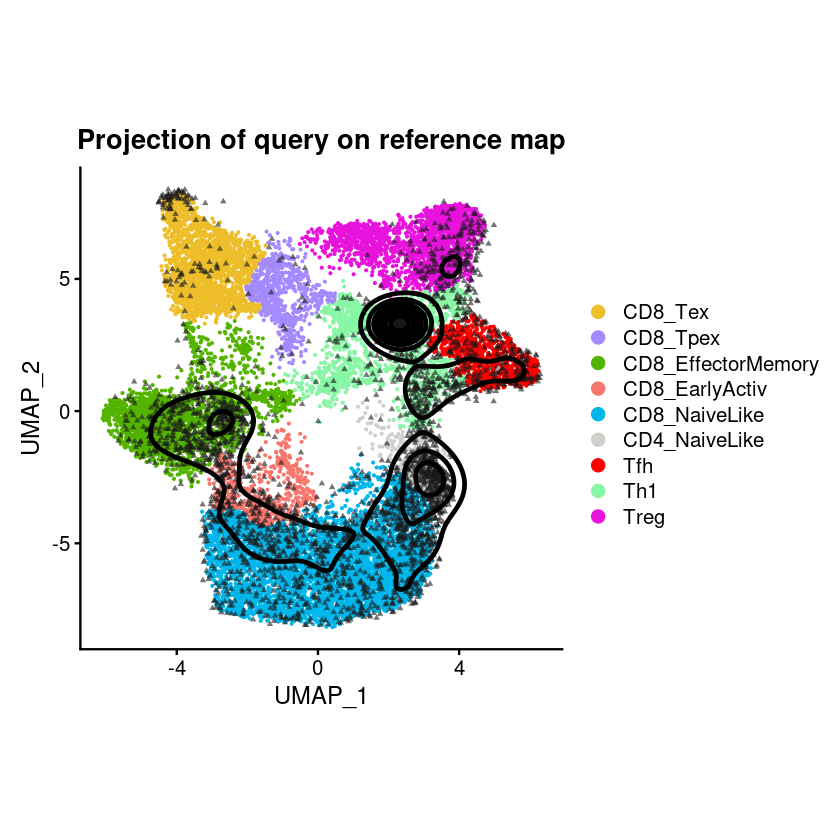

In [33]:
# plot.projection(ref, query.projected)
plot.projection(ref, query.projected.tms)

In [34]:
# query.projected <- cellstate.predict(ref=ref, query=query.projected)
# table(query.projected$functional.cluster)
query.projected.tms <- cellstate.predict(ref=ref, query=query.projected.tms)
table(query.projected.tms$functional.cluster)

Creating slots functional.cluster and functional.cluster.conf in query object




     CD4_NaiveLike     CD8_EarlyActiv CD8_EffectorMemory      CD8_NaiveLike 
               268                184                580               1177 
           CD8_Tex           CD8_Tpex                Tfh                Th1 
                89                 23                223                752 
              Treg 
               153 

In [90]:
table(querydata_tms@meta.data$leiden_reorder)


  1   2   3   4   5   6   7   8   9  10  11 
402 490 629 165 370 140 560 246 499 112 156 

In [93]:
query.projected.tms@meta.data

orig.ident nCount_RNA nFeature_RNA
A12_D045342_B009019_S12.mm10-plus-0-0 Query      1207        686        
A13_B002452_B009020_S13.mm10-plus-0-0 Query      1612       1205        
A14_B002452_B009020_S14.mm10-plus-0-0 Query      1466       1069        
A15_B002452_B009020_S15.mm10-plus-0-0 Query      1563       1259        
A16_D045342_B009019_S16.mm10-plus-0-0 Query      1189        692        
A19_B002452_B009020_S19.mm10-plus-0-0 Query      1442       1125        
A1_B002452_B009020_S1.mm10-plus-0-0   Query      1393       1065        
A4_B002452_B009020_S4.mm10-plus-0-0   Query      1467       1172        
B13_B002452_B009020_S37.mm10-plus-0-0 Query      1492       1090        
B1_D045342_B009019_S25.mm10-plus-0-0  Query      1327        929        
B21_B002452_B009020_S45.mm10-plus-0-0 Query      1503       1212        
B22_B002452_B009020_S46.mm10-plus-0-0 Query      1664       1318        
B3_B002452_B009020_S27.mm10-plus-0-0  Query      1427       1120        
B6_B002452_B009020_S30.mm10-plus-0-0  Query      1566       1236        
B9_B002452_B009020_S33.mm10-plus-0-0  Query      1501       1223        
C11_B002452_B009020_S59.mm10-plus-0-0 Query      1441       1152        
C16_B002452_B009020_S64.mm10-plus-0-0 Query      1489       1200        
C17_B002452_B009020_S65.mm10-plus-0-0 Query      1602       1278        
C19_B002452_B009020_S67.mm10-plus-0-0 Query      1479       1213        
C20_B002452_B009020_S68.mm10-plus-0-0 Query      1649       1233        
C21_B002452_B009020_S69.mm10-plus-0-0 Query      1492       1145        
C2_D045342_B009019_S50.mm10-plus-0-0  Query      1215        751        
C6_B002452_B009020_S54.mm10-plus-0-0  Query      1500       1208        
D10_B002452_B009020_S82.mm10-plus-0-0 Query      1571       1327        
D15_B002452_B009020_S87.mm10-plus-0-0 Query      1391       1143        
D19_B000802_B009022_S91.mm10-plus-0-0 Query      1911       1491        
D20_D045342_B009019_S92.mm10-plus-0-0 Query      1305        830        
D6_B002452_B009020_S78.mm10-plus-0-0  Query      1444       1186        
D7_B002452_B009020_S79.mm10-plus-0-0  Query      1314       1063        
D9_B002452_B009020_S81.mm10-plus-0-0  Query      1463       1201        
⋮                                     ⋮          ⋮          ⋮           
P3.D042105.3_11_M.1.1-1-1             Query      1499       1057        
P3.D042186.3_8_M.1.1-1-1              Query      1320        957        
P3.MAA000510.3_8_M.1.1-1-1            Query      1089        871        
P4.B001750.3_38_F.1.1-1-1             Query      1383        935        
P4.D042185.3_9_M.1.1-1-1              Query      1205        882        
P4.D042193.3_8_M.1.1-1-1              Query      1363        925        
P4.MAA000510.3_8_M.1.1-1-1            Query      1079        789        
P4.MAA000779.3_11_M.1.1-1-1           Query      1364        820        
P5.D042105.3_11_M.1.1-1-1             Query      1443       1007        
P5.D042186.3_8_M.1.1-1-1              Query      1225        811        
P5.MAA000508.3_9_M.1.1-1-1            Query      1082        748        
P6.B002010.3_39_F.1.1-1-1             Query      1463       1145        
P6.D042180.3_10_M.1.1-1-1             Query      1100        772        
P6.MAA000508.3_9_M.1.1-1-1            Query       908        683        
P6.MAA001865.3_38_F.1.1-1-1           Query      1498       1197        
P7.B000633.3_56_F.1.1-1-1             Query      1514       1210        
P7.MAA000442.3_11_M.1.1-1-1           Query      1341        899        
P7.MAA000538.3_8_M.1.1-1-1            Query      1116        838        
P7.MAA000779.3_11_M.1.1-1-1           Query      1621       1107        
P8.B001750.3_38_F.1.1-1-1             Query      1532       1099        
P8.D042180.3_10_M.1.1-1-1             Query      1119        735        
P8.D042186.3_8_M.1.1-1-1              Query      1438       1085        
P8.MAA000556.3_9_M.1.1-1-1            Query       981        686        
P8.MAA000779.3_11_M.1.1

In [94]:
df_res = merge(querydata_tms@meta.data, query.projected.tms@meta.data, by = 0, all = TRUE)
df_res = transform(df_res, row.names=Row.names, Row.names=NULL)

In [107]:
table(df_res[ind_select, c('functional.cluster', 'functional.cluster.conf')])

                    functional.cluster.conf
functional.cluster   0.35 0.4 0.45 0.5 0.55 0.6 0.65 0.7 0.75 0.8 0.85 0.9 0.95
  CD8_EarlyActiv        0   0    1   2    1   2    0   0    0   1    0   0    0
  CD8_EffectorMemory    0   0    1   1    1   2    0   1    1   0    1   3    0
  CD8_NaiveLike         0   1    0   0    0   1    1   1    0   1    0   0    1
  CD8_Tex               1   0    0   0    0   0    0   0    0   0    0   0    0
                    functional.cluster.conf
functional.cluster   1
  CD8_EarlyActiv     0
  CD8_EffectorMemory 4
  CD8_NaiveLike      0
  CD8_Tex            0

In [109]:
help(table)

In [108]:
ind_select = is.na(df_res$functional.cluster)
table(df_res[ind_select,]$leiden_reorder)

for (cluster in c(1:11)){
    ind_select = df_res$leiden_reorder == cluster
    print(cluster)
    print(table(df_res[ind_select, c('functional.cluster', 'functional.cluster.conf')]))
    }


  1   2   3   4   5   6   7   8   9  10  11 
  1   2   4 108   1   9  53   1  11   3 127 

[1] 1
                  functional.cluster.conf
functional.cluster 0.3 0.45 0.5 0.55 0.6 0.65 0.7 0.75 0.8 0.85 0.9 0.95   1
    CD4_NaiveLike    0    1   3    9   4    9   7   10   6   13  15   15  65
    CD8_EarlyActiv   1    0   1    1   1    0   0    0   0    1   0    0   0
    CD8_NaiveLike    0    0  13    7   3    2   9    7   5    8  13   25 144
    Th1              0    0   0    0   1    0   0    0   1    0   0    0   1
[1] 2
                    functional.cluster.conf
functional.cluster   0.3 0.35 0.4 0.45 0.5 0.55 0.6 0.65 0.7 0.75 0.8 0.85 0.9
  CD4_NaiveLike        0    0   0    1   1    4   6    6  14    6   3    5   6
  CD8_EarlyActiv       0    0   0    0   1    0   0    0   1    0   0    0   0
  CD8_EffectorMemory   0    1   0    0   0    1   0    2   1    1   2    0   0
  CD8_NaiveLike        1    2   2    0  12    8   6    4  11    6  13   17  15
  Th1                  0    0   0    0   2    0   3    0   0    1   1    0   2
                    functional.cluster.conf

In [100]:
c(1:11)

[1]  1  2  3  4  5  6  7  8  9 10 11

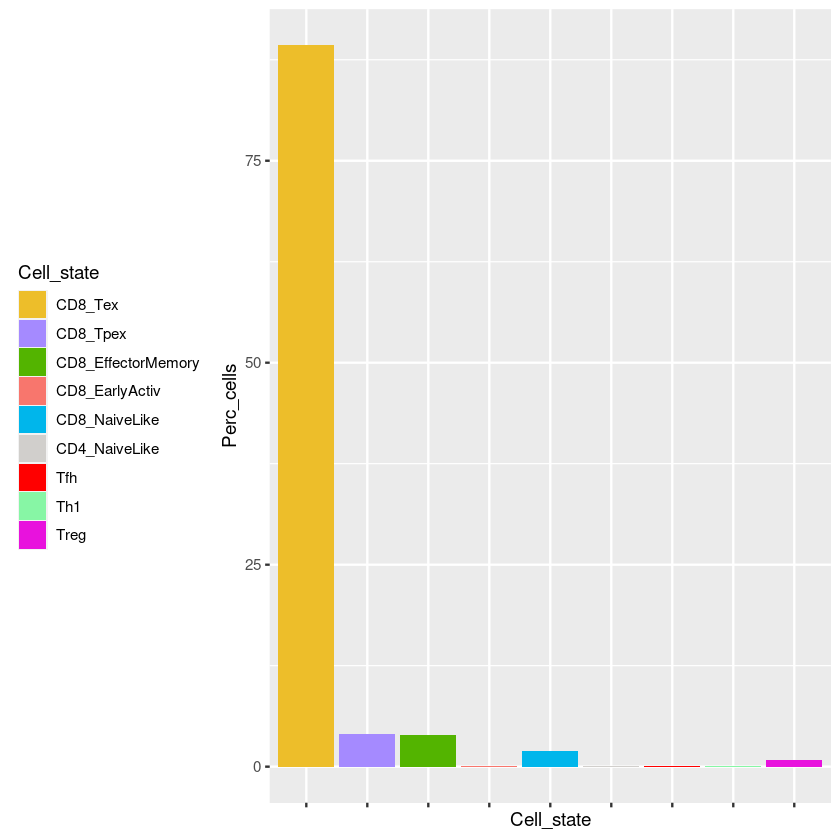

In [14]:
plot.statepred.composition(ref, query.projected,metric = "Percent")


Loading required package: scales

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




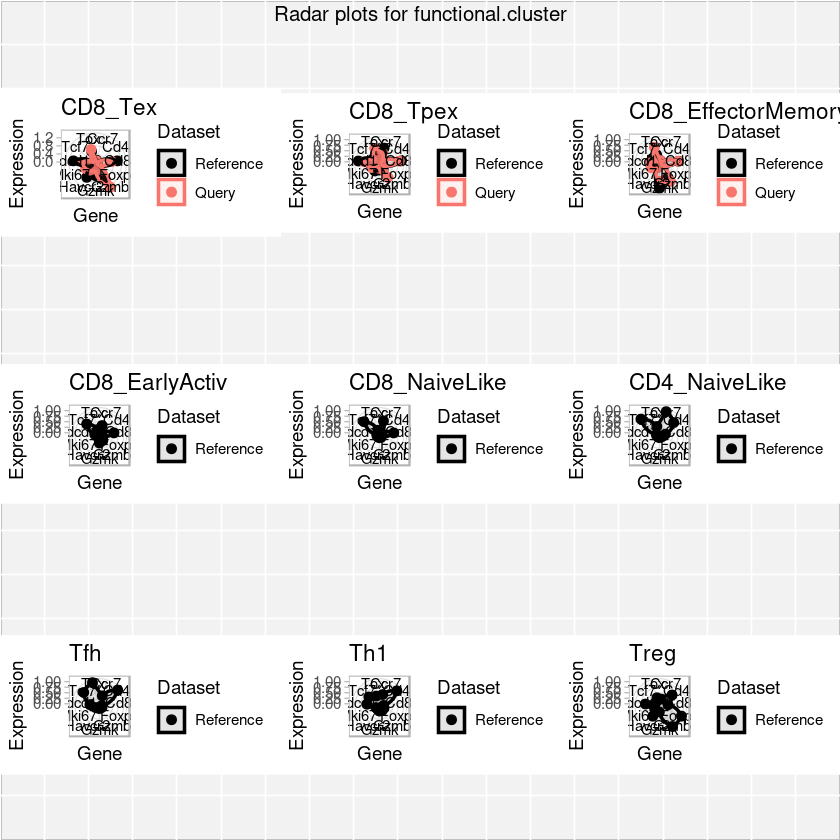

In [15]:
plot.states.radar(ref, query=query.projected, min.cells=30)
